<a href="https://colab.research.google.com/github/Jenny-high/Research/blob/main/intrinsic_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Make sure to set the runtime to GPU: Runtime -> Change runtime type -> T4 GPU

You can upload your own images, then change the relevant code cells to load it and send it through the model.

In [ ]:
# install the intrinsic decomposition repo from github
!pip install https://github.com/compphoto/Intrinsic/archive/main.zip

  Using cached https://github.com/compphoto/Intrinsic/archive/main.zip
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/CCareaga/MiDaS (to revision master) to /tmp/pip-install-_pjhyf_1/altered-midas_ac18ebffabd846a692ad4cf7a48fd082
  Running command git clone --filter=blob:none --quiet https://github.com/CCareaga/MiDaS /tmp/pip-install-_pjhyf_1/altered-midas_ac18ebffabd846a692ad4cf7a48fd082
  Resolved https://github.com/CCareaga/MiDaS to commit fb51e3af860d9430e9aaeb1d30edd3b6e2ac0538
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/CCareaga/chrislib (to revision main) to /tmp/pip-install-_pjhyf_1/chrislib_53f3682026244097b5409cc1ec113654
  Running command git clone --filter=blob:none --quiet https://github.com/CCareaga/chrislib /tmp/pip-install-_pjhyf_1/chrislib_53f3682026244097b5409cc1ec113654
  Resolved https://github.com/CCareaga/chrislib to commit 9a4c63f5fc5e7bbe62288f2777c527b706eb04d0
  Preparing metadata (setup.py) ... done


In [ ]:
import torch
# import some helper functions from chrislib (will be installed by the intrinsic repo)
from chrislib.general import show, view, invert
from chrislib.data_util import load_from_url

# import model loading and running the pipeline
from intrinsic.pipeline import load_models, run_pipeline

import numpy as np
import skimage.transform as st
from google.colab import files
from PIL import Image
import io
from datetime import datetime
import os

print("必要なすべてのライブラリがインポートされました。")

必要なすべてのライブラリがインポートされました。


In [ ]:
# download the pretrained weights and return the model (may take a bit to download weights the first time)
intrinsic_model = load_models('v2')
print("Intrinsicモデルがロードされました。")

loading v2 weights


Using cache found in /root/.cache/torch/hub/facebookresearch_WSL-Images_main
Using cache found in /root/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master
Using cache found in /root/.cache/torch/hub/facebookresearch_WSL-Images_main
Using cache found in /root/.cache/torch/hub/facebookresearch_WSL-Images_main
Using cache found in /root/.cache/torch/hub/facebookresearch_WSL-Images_main


Intrinsicモデルがロードされました。


In [ ]:
uploaded = files.upload()

# Initialize img1 and img2
img1 = None
img2 = None

image_files = list(uploaded.keys())

if len(image_files) >= 2:
    # Process the first image
    img_bytes1 = uploaded[image_files[0]]
    pil_img1 = Image.open(io.BytesIO(img_bytes1)).convert('RGB') # Ensure RGB format
    img1 = torch.from_numpy(np.array(pil_img1)).float() / 255.0 # Convert to numpy, then tensor and normalize
    img1 = img1.permute(2, 0, 1) # Permute to C, H, W

    # Process the second image
    img_bytes2 = uploaded[image_files[1]]
    pil_img2 = Image.open(io.BytesIO(img_bytes2)).convert('RGB') # Ensure RGB format
    img2 = torch.from_numpy(np.array(pil_img2)).float() / 255.0 # Convert to numpy, then tensor and normalize
    img2 = img2.permute(2, 0, 1) # Permute to C, H, W

    print(f"'{image_files[0]}' と '{image_files[1]}' が img1 および img2 に正常にアップロードおよびロードされました。")
elif len(image_files) == 1:
    # Process the first image
    img_bytes1 = uploaded[image_files[0]]
    pil_img1 = Image.open(io.BytesIO(img_bytes1)).convert('RGB') # Ensure RGB format
    img1 = torch.from_numpy(np.array(pil_img1)).float() / 255.0 # Convert to numpy, then tensor and normalize
    img1 = img1.permute(2, 0, 1) # Permute to C, H, W
    print(f"'{image_files[0]}' が img1 に正常にアップロードおよびロードされました。img2 が必要な場合は、別の画像をアップロードしてください。")
else:
    print("画像はアップロードされませんでした。")

Saving view1.png to view1 (5).png
'view1 (5).png' が img1 に正常にアップロードおよびロードされました。img2 が必要な場合は、別の画像をアップロードしてください。


img1 の固有分解が正常に実行されました。
img1 のコンポーネント (img1_display, alb1, dif1, res1) が抽出され準備されました。
img1 のスペックルフリー画像 (spec_free_img1) が計算されました。
img1 のオリジナル、スペックルフリー、アルベド画像が表示されました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

保存とダウンロードが完了しました: view1 (5)_20260122_original.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

保存とダウンロードが完了しました: view1 (5)_20260122_specular-free.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

保存とダウンロードが完了しました: view1 (5)_20260122_albedo.png
要求されたすべての画像が保存およびダウンロードされました。


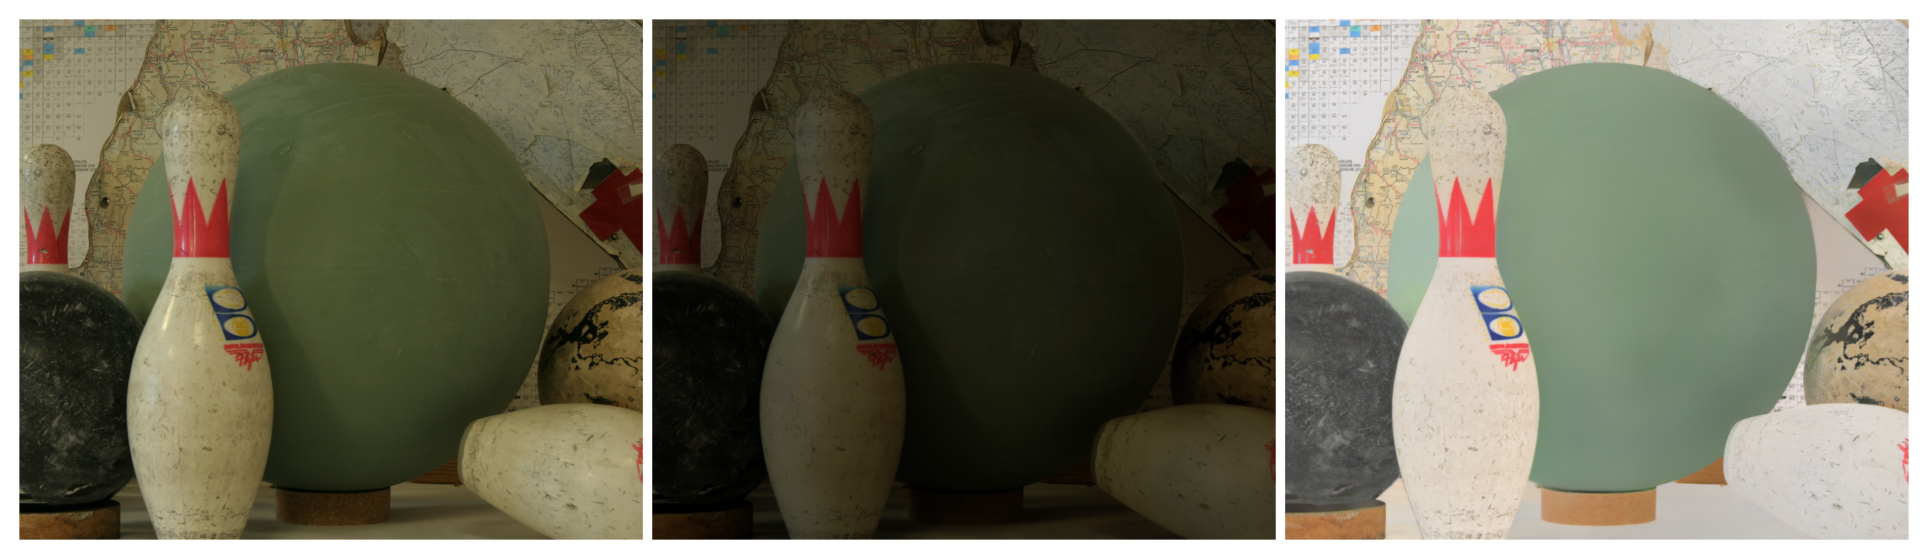

In [ ]:
if img1 is not None:
    # Run intrinsic decomposition on img1
    result1 = run_pipeline(
        intrinsic_model,
        img1.permute(1, 2, 0).cpu().numpy(), # Convert from (C, H, W) tensor to (H, W, C) numpy array
        device='cuda',
        resize_conf=None
    )
    print("img1 の固有分解が正常に実行されました。")

    # Extract and prepare components for img1
    img1_display = img1.permute(1, 2, 0).cpu().numpy() # Convert from (C, H, W) tensor to (H, W, C) numpy array for display
    alb1 = view(result1['hr_alb']) # gamma correct the estimated albedo for img1
    dif1 = 1 - invert(result1['dif_shd']) # tonemap the diffuse shading for img1
    res1 = result1['residual']
    print("img1 のコンポーネント (img1_display, alb1, dif1, res1) が抽出され準備されました。")

    # Calculate specular-free image for img1
    spec_free_img1 = alb1 * dif1
    print("img1 のスペックルフリー画像 (spec_free_img1) が計算されました。")

    # Resize components for display if necessary and display results
    target_h, target_w, _ = img1_display.shape
    alb1_resized = st.resize(alb1, (target_h, target_w), anti_aliasing=True)
    spec_free_img1_resized = st.resize(spec_free_img1, (target_h, target_w), anti_aliasing=True)

    show([img1_display, spec_free_img1_resized, alb1_resized], size=(30, 7))
    print("img1 のオリジナル、スペキュラーフリー、アルベド画像が表示されました。")

    # Get the original filename without extension (assuming image_files is available from upload cell)
    original_filename_base = os.path.splitext(image_files[0])[0]

    # Get current date in YYYYMMDD format
    current_date = datetime.now().strftime("%Y%m%d")

    # Prepare images and their types for saving
    images_to_save = [
        (img1_display, "original"),
        (spec_free_img1_resized, "specular-free"),
        (alb1_resized, "albedo")
    ]

    for img_array, img_type in images_to_save:
        # Ensure image data is in 0-255 range and uint8 type for PIL
        img_uint8 = (img_array * 255).astype(np.uint8)

        # Create a PIL Image object
        pil_img = Image.fromarray(img_uint8)

        # Construct the filename
        save_filename = f"{original_filename_base}_{current_date}_{img_type}.png"

        # Save the image to a temporary location and provide a download link
        pil_img.save(save_filename)
        files.download(save_filename)
        print(f"保存とダウンロードが完了しました: {save_filename}")

    print("要求されたすべての画像が保存およびダウンロードされました。")

else:
    print("img1 は処理できません。まず画像をアップロードしてください。")